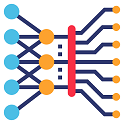

# **Imersão Dados 4 - Alura**
## Antonio Andrade

[Aula 1](#scrollTo=imJ4bbQ6vOMF)
>[Desafios desta aula](#scrollTo=jDvm5Bxc4sQk)

>>[Carregando a base de dados](#scrollTo=kX0SRmdP5Vxa)

>>[1 - Realizar a média da metragem para cada um dos bairros. (Proposto pelo Paulo)](#scrollTo=j8GP4KSJ3XkC)

>>[2 - Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas). (Proposto pelo Thiago)](#scrollTo=h4firn5IXyaK)

>>[3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, assim como tentar colocar alguma conclusão. (Proposto pelo Thiago)](#scrollTo=rPaDE9eaqBaY)

>>[4 - Pegar outras estatísticas dos dados (como média, mediana, mim, max). (Proposto pela Vivian)](#scrollTo=aLILbr-hPC40)

>>[5 - Descobrir quais são os bairros que não tem nome de rua. (Proposto pela Vivian)](#scrollTo=uC45zZqNTpUz)


>[Aula 2](#scrollTo=nf33G16iT5uW&line=1)

>>[1. "Data Cleaning" - Substituindo caracteres não compatíveis com os valores](#scrollTo=d7skgX4cU0R8)

>>[2. Convertendo "string" para "numeric"](#scrollTo=wYlPsTQ-UW2S&line=1)

>[Aula 3]()

>[Aula 4]()

>[Apêndice - MAPAS](#scrollTo=lXJ_VrIy4Y0Q&line=1)

# Desafios desta aula


Começaremos a nossa análise de dados entendendo as características gerais dos nossos dados e olhando mais no detalhe para os bairros que tem imóveis à venda.



# Carregando a base de dados

Em primeiro lugar, devemos importar a base de dados. Eu fiz da seguinte maneira:

- Com o link fornecido na descrição da aula
(https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv), ao clicar neste link, os dados "aparecem" em uma janela do navegador. 

- Clicando com o botão direito do mouse sobre este conjunto de dados nesta janela, há a opção de salvar estes dados (salvar como "filename.csv")

- Estes dados foram salvos em um diretório local. 


No ambiente do Colab, importar a biblioteca "Pandas", necessária para as análises de dados:


## 1 - Realizar a média da metragem para cada um dos bairros. (Proposto pelo Paulo

In [1]:
# Importando as bibliotecas necessárias:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from shapely.geometry import Point, LineString, Polygon

In [3]:
import shapely

In [4]:
!pip install --upgrade geopandas # (para instalar geopandas)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.4 MB/s 
     |████████████████████████████████| 6.3 MB 34.6 MB/s 
     |████████████████████████████████| 16.7 MB 383 kB/s 


In [5]:
import geopandas as gpd

In [ ]:
# Criando o data frame com os dados:

# Lendo os dados diretamente da webpage,

endereco = 'https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv'
df = pd.read_csv(endereco)
df.head(7) # lendo as primeiras informações com a fç head(as primeiras 7 linhas).

# Quando o dado está em algum diretório local, faço da seguinte maneira. 
# Selecionar este modo se não quiser fazer com o anterior. 
# No lado esquerdo do colab, colocar o cursor do mouse sobre o ícone "pasta", e clicar sobre ele. Então, basta fazer o "drag and drop" do seu
# arquivo de interesse, nesta mesma região à esquerda do Colab e mais abaixo desta pasta. 
# dando um duplo clic neste arquivo agora ele já abre para uma "preview" do lado direito da interface do colab, no lado direito. 
# Assim já é possivel ter uma "visão bem geral dos dados".

# Aí é só criar o objeto com o nome que desejar e "chamar o arquivo" com a fç "pd.read_csv?()"


# Se quiser fazer assim, siga os passos anteriores e retire a hashtag das senteças a seguir:

# df = pd.read_csv('dados_imoveis.csv')

# df.head(7) # lendo as 7 primeiras linhas do data frame


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000
6,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,R$ 850.000


Este data frame possui 10008 linhas X 8 features(colunas)


In [ ]:
df.info() # informação sobre os tipos de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


Primeiro vamos observar a metragem média de todos os imóveis:

In [ ]:
df.describe()

,Metragem,Quartos,Banheiros,Vagas
count,10008.000000,10008.000000,10008.000000,10008.000000
mean,442.300659,3.483114,3.879097,4.097222
std,7515.379389,1.064200,1.988467,2.824014
min,10.000000,1.000000,1.000000,1.000000
25%,173.000000,3.000000,2.000000,2.000000
50%,290.000000,3.000000,4.000000,4.000000
75%,460.250000,4.000000,5.000000,5.000000
max,750000.000000,16.000000,40.000000,50.000000


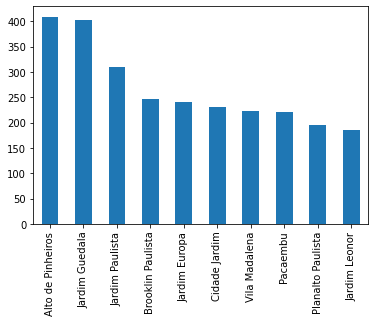

In [ ]:
# Quantidade de imovéis por bairros:

imoveis_por_bairro = df["Bairro"].value_counts()
imoveis_por_bairro.head(10).plot.bar()

Observa-se que provavelmente o valor médio da metragem foi elevado devida à influência daqueles valores cuja metragem do imóvel era "muito grande".

In [ ]:
metragem_media_TodosImoveis = df['Metragem'].mean()
metragem_media_TodosImoveis

442.30065947242207

No caso da média, existem imóveis com uma metragem muito alta ("Sitio Represa = 37000 m^2), podendo caracterizar "outliers". Além disso, observa-se que o "standard deviations" da metragem do imóvel é muito elevado, indicando algum viés ao observá-la. Vamos então analisar o valor da mediana, ou o valor central dos dados. 

In [ ]:
# pela mediana (valores que ocupam a posição central dos dados):
metragem_mediana_TodosImoveis = df['Metragem'].median()
print(f'Pela mediana, observamos como valor central a metragem de {metragem_mediana_TodosImoveis} metros quadrados.')

Pela mediana, observamos como valor central a metragem de 290.0 metros quadrados.


In [ ]:
# metragem mínima e máxima:
metragem_min, metragem_max = df['Metragem'].min(), df['Metragem'].max()
metragem_min, metragem_max
print(f'As metragens são:\n mínima = {metragem_min} metros quadrados', f'\n máxima = {metragem_max} metros quadrados')

As metragens são:
 mínima = 10 metros quadrados 
 máxima = 750000 metros quadrados


In [ ]:
# Agora por bairro:

# Primeiro realizar o agrupamento dos bairros, usando a função "groupby"
# Depois aplicar a função "mean()"

metragem_mediaImovel_bairro = df.groupby(['Bairro']).mean()
metragem_mediaImovel_bairro



,Metragem,Quartos,Banheiros,Vagas
Bairro,,,,
Aclimação,253.056818,3.318182,3.079545,2.909091
Alto da Boa Vista,418.875000,4.125000,5.125000,4.625000
Alto da Lapa,294.337209,3.151163,3.790698,3.906977
Alto da Mooca,270.050000,3.300000,2.600000,3.650000
Alto de Pinheiros,433.444988,3.938875,4.838631,5.004890
...,...,...,...,...
Vila Água Funda,152.200000,2.600000,2.200000,2.600000
Água Branca,191.000000,3.153846,3.076923,2.461538
Água Fria,165.416667,2.833333,3.416667,2.500000


Como os dados foram agrupados, ocorreu uma diminuição do número de observações, sendo que agora o data frame é composto de 701 rows ou linhas, ou 701 bairros.

In [ ]:
# ordenando a metragem dos bairros por ordem decrescente da metragem disponível

metragem_mediaImovel_bairro_decrescente = metragem_mediaImovel_bairro.sort_values(by='Metragem', ascending = False)
metragem_mediaImovel_bairro_decrescente

,Metragem,Quartos,Banheiros,Vagas
Bairro,,,,
Sítio Represa,37000.000000,4.000000,2.000000,4.000000
Vila Castelo,2850.000000,3.000000,3.000000,10.000000
Jardim Guedala,2486.640199,4.091811,5.732010,6.057072
Jardim das Camélias,1700.000000,4.000000,7.000000,13.000000
Chácara Flora,1260.727273,4.818182,6.545455,7.272727
...,...,...,...,...
Cidade Antônio Estevão de Carvalho,57.500000,2.000000,1.000000,1.000000
Jardim Nova Germania,57.000000,3.000000,1.000000,5.000000
Jardim Benfica,48.000000,2.000000,1.000000,1.000000


Observa-se um valor de metragem bem alto, de 37000 metros quadrados. 

In [ ]:
metragem_medianaImovel_bairro = df.groupby(['Bairro']).median()
metragem_medianaImovel_bairro

,Metragem,Quartos,Banheiros,Vagas
Bairro,,,,
Aclimação,227.5,3.0,3.0,3.0
Alto da Boa Vista,378.0,4.0,5.5,4.0
Alto da Lapa,255.0,3.0,4.0,4.0
Alto da Mooca,182.5,3.0,2.0,4.0
Alto de Pinheiros,412.0,4.0,5.0,4.0
...,...,...,...,...
Vila Água Funda,143.0,2.0,2.0,2.0
Água Branca,174.0,3.0,3.0,2.0
Água Fria,174.5,3.0,4.0,2.0


In [ ]:
metragem_medianaImovel_bairro_decrescente = metragem_medianaImovel_bairro.sort_values(by='Metragem', ascending = False)
metragem_medianaImovel_bairro_decrescente


,Metragem,Quartos,Banheiros,Vagas
Bairro,,,,
Sítio Represa,37000.0,4.0,2.0,4.0
Vila Castelo,2850.0,3.0,3.0,10.0
Jardim das Camélias,1700.0,4.0,7.0,13.0
Jardim Sílvia (Zona Oeste),1423.0,4.0,5.0,8.0
Chácara Flora,1300.0,5.0,6.0,9.0
...,...,...,...,...
Cidade Antônio Estevão de Carvalho,57.5,2.0,1.0,1.0
Jardim Nova Germania,57.0,3.0,1.0,5.0
Jardim Benfica,48.0,2.0,1.0,1.0


As demais características dos imóveis também. Observa-se na base dos dados imóveis com até 10 banheiros e com várias vagas. Isto pode influenciar os valores médios. 


## 2 - Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas). (Proposto pelo Thiago)

## 3- Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, assim como tentar colocar alguma conclusão. (Proposto pelo Thiago) 

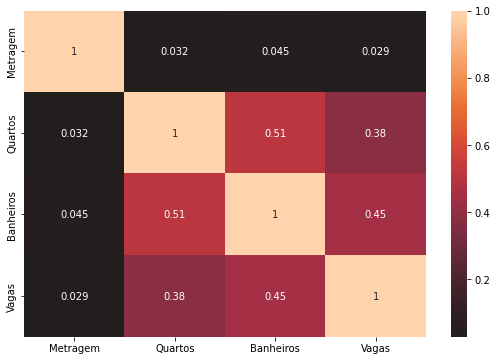

In [ ]:
plt.figure(figsize = (9,6))
sns.heatmap(df.corr(),annot=True,center=0 )

Esta matrix de correlação demonstra, em primeiro lugar, que há uma associação entre o n.º quartos e o número de banheiros (0.51), talvez porque seriam feitas suítes (??) e vagas e banheiros (0.45). 
Há uma associação 'baixa' entre metragem e nº vagas. Cumpre aqui ressaltar que talvez sejam questões relacionadas à mobilidade hurbana, uso de outros meios de transporte público (como por exemplo o metrô), que deveria ser explorada cruzando com outros dados para corroborar esta hipótese. 

## 4 - Pegar outras estatísticas dos dados (como média, mediana, min, max)

In [ ]:
bairros_grupos = df.groupby(['Bairro'])
bairros_grupos_min = bairros_grupos.min(['Metragem'])

bairros_grupos_min

# metragem média dos imóveis (tamanho médio da metragem, quartos, banheiros e vagas garagem)

# bairros_metragem_media.max()


,Metragem,Quartos,Banheiros,Vagas
Bairro,,,,
Aclimação,104,2,1,1
Alto da Boa Vista,315,4,3,3
Alto da Lapa,46,1,1,1
Alto da Mooca,84,2,1,1
Alto de Pinheiros,100,2,1,1
...,...,...,...,...
Vila Água Funda,90,2,2,2
Água Branca,91,2,1,1
Água Fria,60,2,1,2


In [ ]:
# metragem max dos imóveis
bairros_grupos_max = bairros_grupos.max(['Metragem'])
bairros_grupos_max

bairros_grupos_max.sort_values(by='Metragem', ascending = False)


,Metragem,Quartos,Banheiros,Vagas
Bairro,,,,
Jardim Guedala,750000,7,40,20
Sítio Represa,37000,4,2,4
Jardim da Glória,35677,6,9,13
Santo Amaro,7126,7,12,50
Vila Castelo,2850,3,3,10
...,...,...,...,...
Cidade Antônio Estevão de Carvalho,60,2,1,1
Jardim Nova Germania,57,3,1,5
Jardim Benfica,48,2,1,1


In [ ]:
# pela media
bairros_grupos_media= bairros_grupos.mean(['Metragem'])
bairros_grupos_media

bairros_grupos_media.sort_values(by='Metragem', ascending = False)


,Metragem,Quartos,Banheiros,Vagas
Bairro,,,,
Sítio Represa,37000.000000,4.000000,2.000000,4.000000
Vila Castelo,2850.000000,3.000000,3.000000,10.000000
Jardim Guedala,2486.640199,4.091811,5.732010,6.057072
Jardim das Camélias,1700.000000,4.000000,7.000000,13.000000
Chácara Flora,1260.727273,4.818182,6.545455,7.272727
...,...,...,...,...
Cidade Antônio Estevão de Carvalho,57.500000,2.000000,1.000000,1.000000
Jardim Nova Germania,57.000000,3.000000,1.000000,5.000000
Jardim Benfica,48.000000,2.000000,1.000000,1.000000


In [ ]:
# pela mediana
bairros_grupos_mediana = bairros_grupos.median(['Metragem'])
bairros_grupos_mediana

bairros_grupos_mediana.sort_values(by='Metragem', ascending = False)



,Metragem,Quartos,Banheiros,Vagas
Bairro,,,,
Sítio Represa,37000.0,4.0,2.0,4.0
Vila Castelo,2850.0,3.0,3.0,10.0
Jardim das Camélias,1700.0,4.0,7.0,13.0
Jardim Sílvia (Zona Oeste),1423.0,4.0,5.0,8.0
Chácara Flora,1300.0,5.0,6.0,9.0
...,...,...,...,...
Cidade Antônio Estevão de Carvalho,57.5,2.0,1.0,1.0
Jardim Nova Germania,57.0,3.0,1.0,5.0
Jardim Benfica,48.0,2.0,1.0,1.0


## 5 - Descobrir quais são os bairros que não tem nome de rua. (Proposto pela Vivian)

In [ ]:
# criar uma "máscara em Bairros" que retorna os valores faltantes ou NaN

mascara = df["Rua"].isnull() # essa máscara seleciona, na coluna Rua, todos os valores que são NaN

# aplicando a máscara anterior no conjunto dos nossos dados (df), obtemos como retorno os valores faltantes e os respectivos bairros.

Bairros_imovel_SemNomeRua = df[mascara]
Bairros_imovel_SemNomeRua

# ou 
# df['Rua'].isnull().sum()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
11,NaN,Jardim Luzitânia,São Paulo,436,4,3,3,R$ 15.000
31,NaN,Parque da Lapa,São Paulo,220,4,4,3,R$ 849.000
56,NaN,Chácara Santo Antônio (Zona Sul),São Paulo,190,2,2,2,R$ 1.100.000
57,NaN,Jardim Guedala,São Paulo,650,4,6,4,R$ 5.500.000
...,...,...,...,...,...,...,...,...
9963,NaN,Jardim Petrópolis,São Paulo,423,5,7,6,R$ 2.800.000
9989,NaN,Parque Alves de Lima,São Paulo,127,2,1,2,R$ 400.000
9991,NaN,Vila Formosa,São Paulo,145,3,2,3,R$ 750.000
9995,NaN,Jardim Leonor,São Paulo,1350,5,9,7,R$ 9.500.000


In [ ]:
bairros_sem_NomeRua = len(Bairros_imovel_SemNomeRua['Rua'])
print(f'Existem {bairros_sem_NomeRua} imóveis sem nome nas ruas.')

Existem 3434 imóveis sem nome nas ruas.


# Aula2

1. "Data Cleaning" - Substituindo caracteres não compatíveis com os valores/strings

In [ ]:
df.head(4)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [ ]:
df['Valor'].str.split(expand = True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [ ]:
df['Valor'].str.split(expand = True)[0].unique()
# demonstra que as string desta coluna são exclusivamente 'R$""

array(['R$'], dtype=object)

In [ ]:
len(df['Valor'].str.split(expand = True)[1].unique())

1038

Embora o "df" possua 10008 observações, percebe-se que muitas são iguais, resultando tão somente 1038 valores diferentes.

In [ ]:
df['Valor'].str.split(expand = True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [ ]:
# adicionando esta última array ao df:

df[['Moeda', 'Valor_anuncio', 'Tipo_anuncio']] = df['Valor'].str.split(expand = True)
df.head(4)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None


In [ ]:
# Eliminando o que não é venda, através da criação da "máscara"
mascara_aluguel = df['Tipo_anuncio'].isnull()
dados_vendas = df[mascara_aluguel]


In [ ]:
dados_vendas # foi retirado o que é aluguel


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None


## 2. Convertendo "string" para "numeric"

In [ ]:
dados_vendas['Valor_anuncio'].str.replace(".","").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0        7000000.0
1        3700000.0
2         380000.0
3         685000.0
4         540000.0
           ...    
10002    1500000.0
10003     665000.0
10004    2300000.0
10005    1050000.0
10007     270000.0
Name: Valor_anuncio, Length: 9156, dtype: float64

In [ ]:
dados_vendas['Valor_anuncio_float'] = dados_vendas['Valor_anuncio'].str.replace(".","").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dados_vendas.info()
# temos agora a variável "Tipo_anuncio_float" no formato float.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rua                  6107 non-null   object 
 1   Bairro               9146 non-null   object 
 2   Cidade               9156 non-null   object 
 3   Metragem             9156 non-null   int64  
 4   Quartos              9156 non-null   int64  
 5   Banheiros            9156 non-null   int64  
 6   Vagas                9156 non-null   int64  
 7   Valor                9156 non-null   object 
 8   Moeda                9156 non-null   object 
 9   Valor_anuncio        9156 non-null   object 
 10  Tipo_anuncio         0 non-null      object 
 11  Valor_anuncio_float  9156 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 929.9+ KB


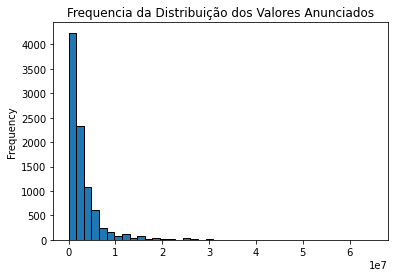

In [ ]:
dados_vendas['Valor_anuncio_float'].plot.hist(bins=40, edgecolor='black', title = 'Frequencia da Distribuição dos Valores Anunciados', xlabel = 'Valor', ylabel = 'Frequencia')

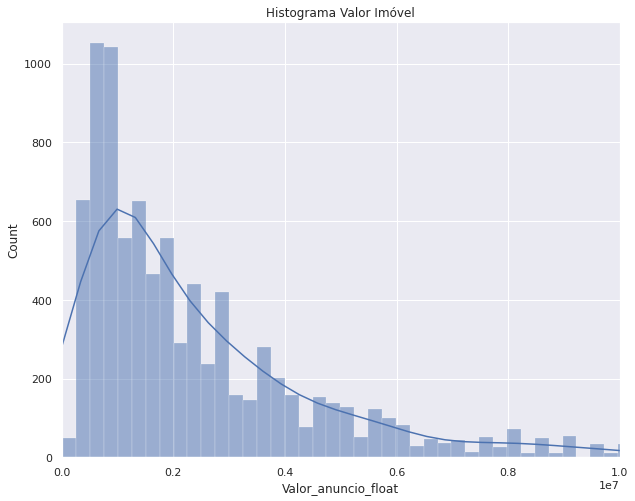

In [ ]:
sns.set()
plt.figure(figsize=(10, 8))
ax = sns.histplot(data = dados_vendas, x = "Valor_anuncio_float", kde = True)
ax.set_title("Histograma Valor Imóvel")
plt.xlim((-50, 10000000))
plt.show()

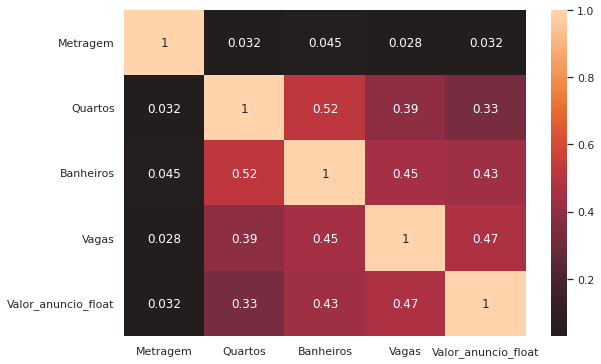

In [ ]:
plt.figure(figsize = (9,6))
sns.heatmap(dados_vendas.corr(),annot=True,center=0 )

Por esta matrix de correlação, agora inseridos os "Valor_anuncio_float", parece que há uma forte associação entre este valor e o número de vagas (0.47) correlação moderada. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


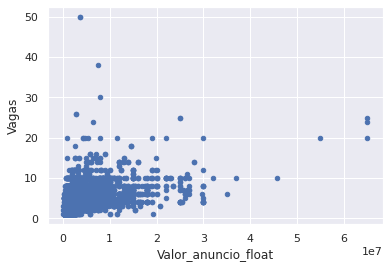

In [ ]:
dados_vendas.plot.scatter(x='Valor_anuncio_float', y='Vagas')

Essa observação não parece ser linear, nem tão pouco o que uma possivel reta com certa inclinação possa representar esta associação positiva

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


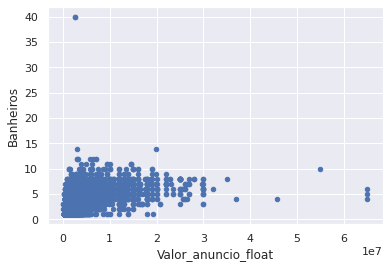

In [ ]:
dados_vendas.plot.scatter(x='Valor_anuncio_float', y='Banheiros')

In [ ]:
pd.set_option('display.precision',2)
pd.set_option('display.float_format', lambda x: '%.2f' %x)
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00
...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.00
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.00
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.00
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.00


In [ ]:
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


In [ ]:
dados_vendas[['Rua','Bairro','Cidade']].describe()

,Rua,Bairro,Cidade
count,6107,9146,9156
unique,3006,697,1
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo
freq,24,369,9156


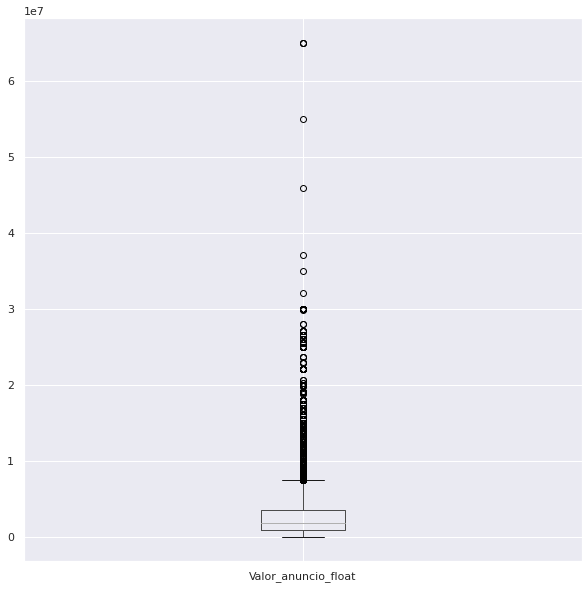

In [ ]:
plt.figure(figsize=(10,10))
dados_vendas.boxplot(column=['Valor_anuncio_float'])

Desafios desta aula

Criar uma escala de valores em milhões.

Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala).

Preço do metro quadrado por bairro e plotar em um gráfico ideal.

Explorar as bibliotecas de visualizações e colocar as suas conclusões.

Pesquisar um visualização para analisar os quartis, mediana e outliers.

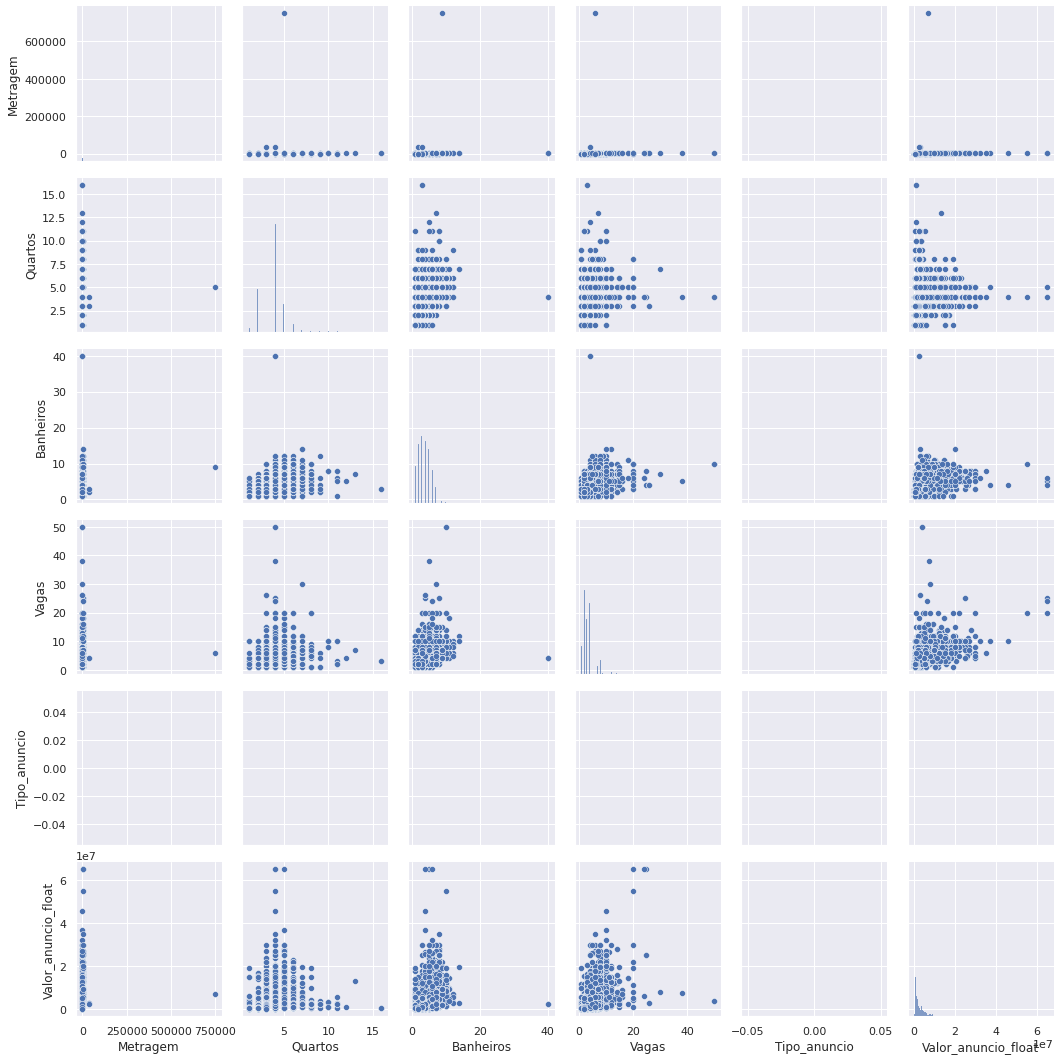

In [ ]:
sns.pairplot(dados_vendas)

Pela relação ou associação entre Valor_metro_quadrado e Valor_anuncio_float, parece haver uma relação direta, implicando sempre um uma verdade quanto maior o metro quadrado, maior o valor anunciado.
Talvez este modelo seja um pouco mais complexo, sendo necessário fracionar melhor esse problema de negócio e associar outras variáveis. 

In [ ]:
# Preço por metro quadrado e gráfico

dados_vendas["Valor_m2"] = (dados_vendas["Valor_anuncio_float"] / dados_vendas["Metragem"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
dados_vendas.head(3)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00


Obs.: Estes dados parecem não apresentar uma distribuição normal das observações. Entender ar razões para tal é um desafio. Dentre as hipótese, por se tratar da cidade de São Paulo, é sábido que existem imóveis cujo metro quadrado deve ser diferente do restante das cidades do país. 
Associar dados geoespaciais aos bairros seria uma opção interessante para tentar descobrir uma possivel associação do valor do metro quadrado pela proximidade de determinados pontos considerados referência do ponto de vista econômico, de desenvolvimento econômico (IDH), ...

Agrupar por bairro e fazer o preço do metro quadrado por bairro:

In [ ]:
dados_vendas.groupby('Bairro').mean()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2
Bairro,,,,,,
Aclimação,246.16,3.27,3.04,2.91,1763200.01,7656.17
Alto da Boa Vista,418.88,4.12,5.12,4.62,2391250.00,5849.57
Alto da Lapa,299.25,3.15,3.85,4.00,2083168.75,7606.73
Alto da Mooca,270.05,3.30,2.60,3.65,1184170.00,5691.74
Alto de Pinheiros,429.85,3.94,4.83,4.95,4782698.96,11269.98
...,...,...,...,...,...,...
Vila Água Funda,152.20,2.60,2.20,2.60,652000.00,4467.13
Água Branca,173.58,3.08,3.25,2.25,1226500.00,7269.11
Água Fria,165.42,2.83,3.42,2.50,927083.33,5841.10


In [ ]:
dados_bairro = dados_vendas.groupby("Bairro").sum()
dados_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2
Bairro,,,,,,
Aclimação,19447,258,240,230,139292801.00,604837.39
Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55
Alto da Lapa,23940,252,308,320,166653500.00,608538.25
Alto da Mooca,5401,66,52,73,23683400.00,113834.80
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61
...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3260000.00,22335.64
Água Branca,2083,37,39,27,14718000.00,87229.37
Água Fria,1985,34,41,30,11125000.00,70093.25


In [ ]:
dados_bairro.reset_index(inplace = True)
dados_bairro

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2
0,Aclimação,19447,258,240,230,139292801.00,604837.39
1,Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55
2,Alto da Lapa,23940,252,308,320,166653500.00,608538.25
3,Alto da Mooca,5401,66,52,73,23683400.00,113834.80
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61
...,...,...,...,...,...,...,...
692,Vila Água Funda,761,13,11,13,3260000.00,22335.64
693,Água Branca,2083,37,39,27,14718000.00,87229.37
694,Água Fria,1985,34,41,30,11125000.00,70093.25
695,Água Funda,278,6,5,4,1090000.00,7753.73


In [ ]:
dados_bairro["Valor_m2_bairro"] = dados_bairro["Valor_anuncio_float"]/dados_bairro["Metragem"]
dados_bairro

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2,Valor_m2_bairro
0,Aclimação,19447,258,240,230,139292801.00,604837.39,7162.69
1,Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55,5708.74
2,Alto da Lapa,23940,252,308,320,166653500.00,608538.25,6961.30
3,Alto da Mooca,5401,66,52,73,23683400.00,113834.80,4385.00
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
...,...,...,...,...,...,...,...,...
692,Vila Água Funda,761,13,11,13,3260000.00,22335.64,4283.84
693,Água Branca,2083,37,39,27,14718000.00,87229.37,7065.77
694,Água Fria,1985,34,41,30,11125000.00,70093.25,5604.53
695,Água Funda,278,6,5,4,1090000.00,7753.73,3920.86


In [ ]:
top_bairros = dados_vendas["Bairro"].value_counts()[:10].index

In [ ]:
dados_bairro.query("Bairro in @top_bairros")

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2,Valor_m2_bairro
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
19,Brooklin Paulista,70002,778,862,832,475796789.00,1627341.87,6796.90
57,Cidade Jardim,132220,789,1008,1172,1164210900.00,1635692.98,8805.10
155,Jardim Europa,118898,795,993,1056,2414172900.00,4192164.45,20304.57
168,Jardim Guedala,972212,1443,2027,2161,1801165587.00,2833882.79,1852.65
187,Jardim Leonor,97141,697,941,902,646326369.00,1115858.80,6653.49
227,Jardim Paulista,130283,1028,1231,1171,2136081000.00,4279262.19,16395.70
338,Pacaembu,100285,774,889,1028,867956500.00,1753672.28,8654.90
396,Planalto Paulista,59250,636,768,713,374907000.00,1186380.95,6327.54
564,Vila Madalena,66250,739,786,712,583253030.00,1792770.40,8803.82


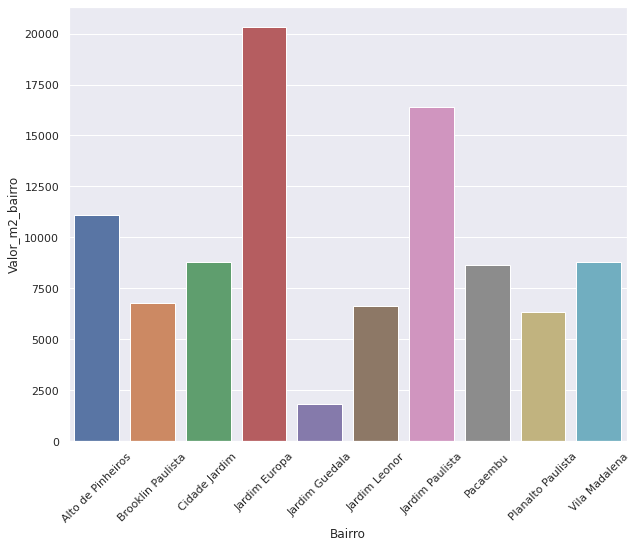

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="Bairro", y="Valor_m2_bairro", data=dados_bairro.query("Bairro in @top_bairros"))
ax.tick_params(axis='x', rotation=45)

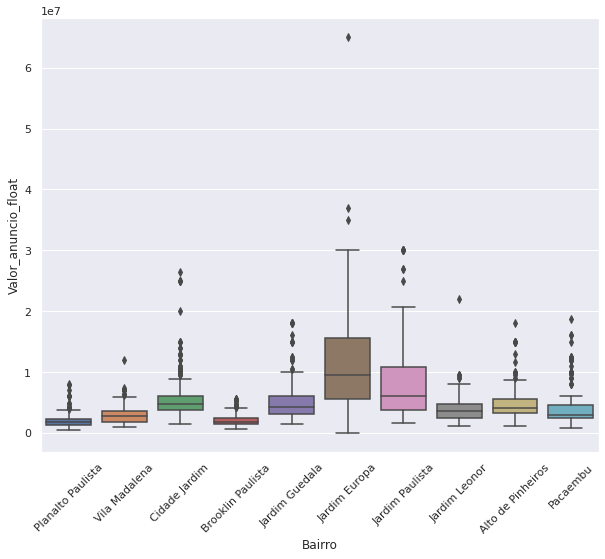

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairros"), x="Bairro", y="Valor_anuncio_float")
ax.tick_params(axis='x', rotation=45)
plt.show()

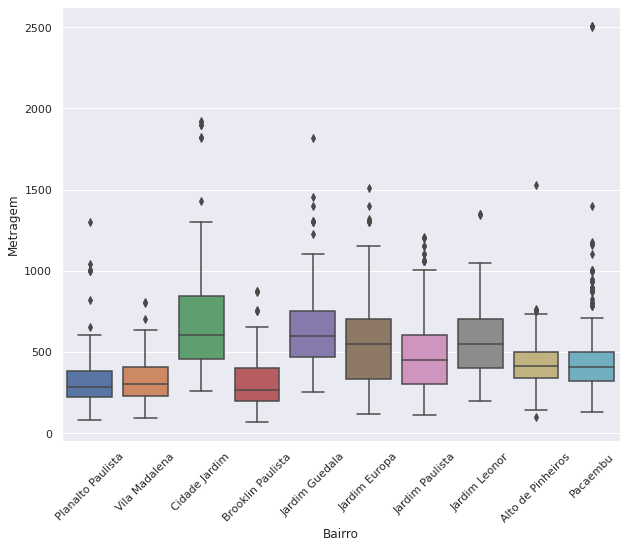

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairros & Metragem < 30000"), x="Bairro", y="Metragem")
ax.tick_params(axis='x', rotation=45)
plt.show()

In [ ]:
dados_bairro.loc["Vila Leopoldina"]

# Aula4

In [ ]:
# Revendo a "base de dados 1"
dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,5400.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.00,5617.98
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.00,7000.00
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.00,3801.65
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.00,5121.95


In [ ]:
# "Base de dados 2" - Necessária para coletar info sobre a renda média da população 
ibge_url = 'https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv'

In [ ]:
ibge_sp = pd.read_csv('https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv',
                      encoding='ISO-8859-15',
                      sep = ';', thousands = '.', decimal = ',')
                      
 # encoding = 'ISO-8859-1'
# no blog da creditas este encoding: iso8859_15  ou ISO-8859-15 (da wikpedia)
ibge_sp.dropna(how = 'all', axis = 1, inplace = True)
ibge_sp.head()


,Cod_setor,Cod_Grandes Regiï¿œes,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Regiï¿œo Sudeste,35,Sï¿œo Paulo,3515,Metropolitana de Sï¿œo Paulo,35061,Sï¿œo Paulo,20,...,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,3,Regiï¿œo Sudeste,35,Sï¿œo Paulo,3515,Metropolitana de Sï¿œo Paulo,35061,Sï¿œo Paulo,20,...,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,3,Regiï¿œo Sudeste,35,Sï¿œo Paulo,3515,Metropolitana de Sï¿œo Paulo,35061,Sï¿œo Paulo,20,...,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,3,Regiï¿œo Sudeste,35,Sï¿œo Paulo,3515,Metropolitana de Sï¿œo Paulo,35061,Sï¿œo Paulo,20,...,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,3,Regiï¿œo Sudeste,35,Sï¿œo Paulo,3515,Metropolitana de Sï¿œo Paulo,35061,Sï¿œo Paulo,20,...,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


In [ ]:
ibge_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cod_setor              18363 non-null  int64  
 1   Cod_Grandes Regiï¿œes  18363 non-null  int64  
 2   Nome_Grande_Regiao     18363 non-null  object 
 3   Cod_UF                 18363 non-null  int64  
 4   Nome_da_UF             18363 non-null  object 
 5   Cod_meso               18363 non-null  int64  
 6   Nome_da_meso           18363 non-null  object 
 7   Cod_micro              18363 non-null  int64  
 8   Nome_da_micro          18363 non-null  object 
 9   Cod_RM                 18363 non-null  int64  
 10  Nome_da_RM             18363 non-null  object 
 11  Cod_municipio          18363 non-null  int64  
 12  Nome_do_municipio      18363 non-null  object 
 13  Cod_distrito           18363 non-null  int64  
 14  Nome_do_distrito       18363 non-null  object 
 15  Co

In [ ]:
enderecos = pd.read_csv('/content/drive/MyDrive/Imersao_Dados_Alura/enderecos.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
enderecos.head()

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
0,Rua,Armando Silveira,Rua Armando Silveira,NaN,Divisa,Santana do Livramento,RS,97573200.00,-30.88,-55.55
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
2,Rua,Prefeito Agenor Barcelos Feio,Rua Prefeito Agenor Barcelos Feio,NaN,Registro,Santana do Livramento,RS,97571090.00,-30.86,-55.56
3,Rua,Sebastião Gomes,Rua Sebastião Gomes - até 59/60,59,Registro,Santana do Livramento,RS,97571374.00,-30.86,-55.55
4,Rua,Marquês do Alegrete,Rua Marquês do Alegrete,NaN,Parque das Águas,Santana do Livramento,RS,97571500.00,-30.86,-55.55


In [ ]:
enderecos_sp = enderecos.query("sigla_uf == 'SP'")
enderecos_sp

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35
...,...,...,...,...,...,...,...,...,...,...
1113858,Rua,Daniel Buccieri,Rua Daniel Buccieri,NaN,Jardim Alvorada,Monte Mor,SP,13198524.00,-22.93,-47.27
1113865,Rua,Ottorino Rizzi,Rua Ottorino Rizzi,NaN,Royal Park,Ribeirão Preto,SP,14028563.00,-21.24,-47.83
1113873,Rua,Adriano Michelutti Cândia,Rua Adriano Michelutti Cândia,NaN,Jardim San Marco II,Ribeirão Preto,SP,14035198.00,-21.20,-47.74
1113882,Rodovia,Mario Tonolli,Rodovia Mario Tonolli,NaN,Morro Alto,Itupeva,SP,13297002.00,-23.19,-47.08


In [ ]:
enderecos_sp["rua"] = enderecos_sp["tipo_logr"] + " " + enderecos_sp["logr_nome"]
enderecos_sp["rua"] = enderecos_sp["rua"].str.lower().str.strip()
enderecos_sp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude,rua
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45,rua joão antônio vasconcelos
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34,rua a
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35,rua a
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33,rua a
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35,rua joão bandini


In [ ]:
dados_vendas["Rua"].str.extract(r'(^[\w ]+)')[:10]  ## só pra visualizar como fica sem o número da rua

,0
0,Avenida Itacira
1,Rua Aurelia Perez Alvarez
2,Rua Alba Valdez
3,NaN
4,Rua Tobias Barreto
5,Rua Graham Bell
6,Rua Francisco Paulo
7,Rua Guilherme Valente
8,Rua Sagrada Família
9,Rua Tapaji


In [ ]:
dados_vendas["apenas_rua"] = dados_vendas["Rua"].str.extract(r'(^[\w ]+)')
dados_vendas["apenas_rua"] = dados_vendas["apenas_rua"].str.lower().str.strip()
dados_vendas.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2,apenas_rua
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00,avenida itacira
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68,rua aurelia perez alvarez
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00,rua alba valdez
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,2209.68,NaN
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,5400.00,rua tobias barreto


In [ ]:
dados_geo = pd.merge(left = dados_vendas, right = enderecos_sp[['rua', 'cep', 'latitude','longitude']], how = 'left', left_on = 'apenas_rua', right_on='rua').drop_duplicates(subset = dados_vendas.columns).query('cep >0')
dados_geo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2,apenas_rua,rua,cep,latitude,longitude
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00,avenida itacira,avenida itacira,11443160.00,-23.98,-46.20
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68,rua aurelia perez alvarez,rua aurelia perez alvarez,4642020.00,-23.64,-46.69
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00,rua alba valdez,rua alba valdez,4845200.00,-23.75,-46.70
7,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,2209.68,NaN,NaN,18125000.00,-23.53,-47.26
26,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,5400.00,rua tobias barreto,rua tobias barreto,13474663.00,-22.70,-47.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89956,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.00,5617.98,avenida odila,avenida odila,4058020.00,-23.61,-46.65
89958,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.00,7000.00,rua tapuçu,rua tapuçu,4671185.00,-23.66,-46.69
89959,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.00,3801.65,rua guararema,rua guararema,13030640.00,-22.92,-47.08
89976,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.00,5121.95,rua estero belaco,rua estero belaco,4145020.00,-23.62,-46.63


In [ ]:
ibge_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cod_setor              18363 non-null  int64  
 1   Cod_Grandes Regiï¿œes  18363 non-null  int64  
 2   Nome_Grande_Regiao     18363 non-null  object 
 3   Cod_UF                 18363 non-null  int64  
 4   Nome_da_UF             18363 non-null  object 
 5   Cod_meso               18363 non-null  int64  
 6   Nome_da_meso           18363 non-null  object 
 7   Cod_micro              18363 non-null  int64  
 8   Nome_da_micro          18363 non-null  object 
 9   Cod_RM                 18363 non-null  int64  
 10  Nome_da_RM             18363 non-null  object 
 11  Cod_municipio          18363 non-null  int64  
 12  Nome_do_municipio      18363 non-null  object 
 13  Cod_distrito           18363 non-null  int64  
 14  Nome_do_distrito       18363 non-null  object 
 15  Co

In [ ]:
setor_censo = gpd.read_file('/content/drive/MyDrive/Imersao_Dados_Alura/setores_censitarios_sp/35SEE250GC_SIR.shp')


In [ ]:
setor_censo.head(3)

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,98237.00,354100005000009,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,1,"POLYGON ((-46.41024 -24.01103, -46.41169 -24.0..."
1,98232.00,354100005000004,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,2,"POLYGON ((-46.41606 -24.00245, -46.41598 -24.0..."
2,98230.00,354100005000002,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,3,"POLYGON ((-46.41213 -24.00792, -46.41244 -24.0..."


In [ ]:
# selecionar apenas o setor censitario referente a São Paulo
setor_censo_sp = setor_censo[setor_censo.NM_MUNICIP == 'SÃO PAULO']


In [ ]:
from shapely.geometry import Point

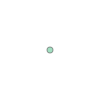

In [ ]:
latitude = -23.56
longitude = -46.59
Point(latitude, longitude)

In [ ]:
dados_geo["Point"] = ""
for i in dados_geo.index:
    dados_geo["Point"][i] = Point(dados_geo["longitude"][i], dados_geo["latitude"][i])

dados_geo['setor_censo'] = dados_geo["Point"].map(lambda x: setor_censo_sp.loc[setor_censo_sp.contains(x), 'CD_GEOCODI'].values).str[0].astype('int64')

dados_geo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


KeyboardInterrupt: ignored

In [ ]:
dados_vendas_censo = pd.merge(left = dados_geo, right = ibge_sp, how = "left", left_on = "setor_censo", right_on = "Cod_setor")
dados_vendas_censo

ValueError: ignored

In [ ]:
dados_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8520 entries, 0 to 89977
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rua                  5639 non-null   object 
 1   Bairro               8512 non-null   object 
 2   Cidade               8520 non-null   object 
 3   Metragem             8520 non-null   int64  
 4   Quartos              8520 non-null   int64  
 5   Banheiros            8520 non-null   int64  
 6   Vagas                8520 non-null   int64  
 7   Valor                8520 non-null   object 
 8   Moeda                8520 non-null   object 
 9   Valor_anuncio        8520 non-null   object 
 10  Tipo_anuncio         0 non-null      object 
 11  Valor_anuncio_float  8520 non-null   float64
 12  Valor_m2             8520 non-null   float64
 13  apenas_rua           5639 non-null   object 
 14  rua                  5639 non-null   object 
 15  cep                  8520 non-null   

In [ ]:
dados_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8520 entries, 0 to 89977
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rua                  5639 non-null   object 
 1   Bairro               8512 non-null   object 
 2   Cidade               8520 non-null   object 
 3   Metragem             8520 non-null   int64  
 4   Quartos              8520 non-null   int64  
 5   Banheiros            8520 non-null   int64  
 6   Vagas                8520 non-null   int64  
 7   Valor                8520 non-null   object 
 8   Moeda                8520 non-null   object 
 9   Valor_anuncio        8520 non-null   object 
 10  Tipo_anuncio         0 non-null      object 
 11  Valor_anuncio_float  8520 non-null   float64
 12  Valor_m2             8520 non-null   float64
 13  apenas_rua           5639 non-null   object 
 14  rua                  5639 non-null   object 
 15  cep                  8520 non-null   

In [ ]:
ibge_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cod_setor              18363 non-null  int64  
 1   Cod_Grandes Regiï¿½es  18363 non-null  int64  
 2   Nome_Grande_Regiao     18363 non-null  object 
 3   Cod_UF                 18363 non-null  int64  
 4   Nome_da_UF             18363 non-null  object 
 5   Cod_meso               18363 non-null  int64  
 6   Nome_da_meso           18363 non-null  object 
 7   Cod_micro              18363 non-null  int64  
 8   Nome_da_micro          18363 non-null  object 
 9   Cod_RM                 18363 non-null  int64  
 10  Nome_da_RM             18363 non-null  object 
 11  Cod_municipio          18363 non-null  int64  
 12  Nome_do_municipio      18363 non-null  object 
 13  Cod_distrito           18363 non-null  int64  
 14  Nome_do_distrito       18363 non-null  object 
 15  Co

In [ ]:
########################################################

In [ ]:
dados_geo = pd.read_csv('dados_geo.csv')
dados_geo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,Valor_mm,Valor_m2,rua,cep,latitude,longitude,Point,setor_censo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.00,NaN,7.00,7000.00,Avenida Itacira,4061000.00,-23.62,-46.65,POINT (-46.6481622 -23.6157934),355030877000067.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.00,NaN,3.70,7459.68,Rua Aurelia Perez Alvarez,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.00,NaN,0.38,3040.00,Rua Alba Valdez,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050.00
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.00,NaN,0.54,5400.00,Rua Tobias Barreto,3176000.00,-23.55,-46.59,POINT (-46.5881729 -23.5499597),355030808000050.00
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000.00,NaN,1.98,4500.00,Rua Graham Bell,4737030.00,-23.59,-46.76,POINT (-46.7600773 -23.5937964),355030865000169.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5600,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,1500000.00,NaN,1.50,5617.98,Avenida Odila,4058020.00,-23.61,-46.65,POINT (-46.6472577 -23.6090928),355030877000099.00
5601,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,665000.00,NaN,0.67,7000.00,Rua Tapuçu,4671185.00,-23.66,-46.69,POINT (-46.6915206 -23.661018),355030816000087.00
5602,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,2300000.00,NaN,2.30,3801.65,Rua Guararema,4136030.00,-23.41,-46.04,POINT (-46.0373872 -23.411688),NaN
5603,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,1050000.00,NaN,1.05,5121.95,Rua Estero Belaco,4145020.00,-23.62,-46.63,POINT (-46.632983 -23.6161237),355030877000052.00


In [ ]:
dados_vendas_censo = pd.read_csv('dados_vendas_censo.csv')
dados_vendas_censo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.00,NaN,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.00,NaN,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.00,NaN,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.00,NaN,...,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000.00,NaN,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5600,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,1500000.00,NaN,...,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
5601,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,665000.00,NaN,...,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
5602,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,2300000.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5603,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,1050000.00,NaN,...,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


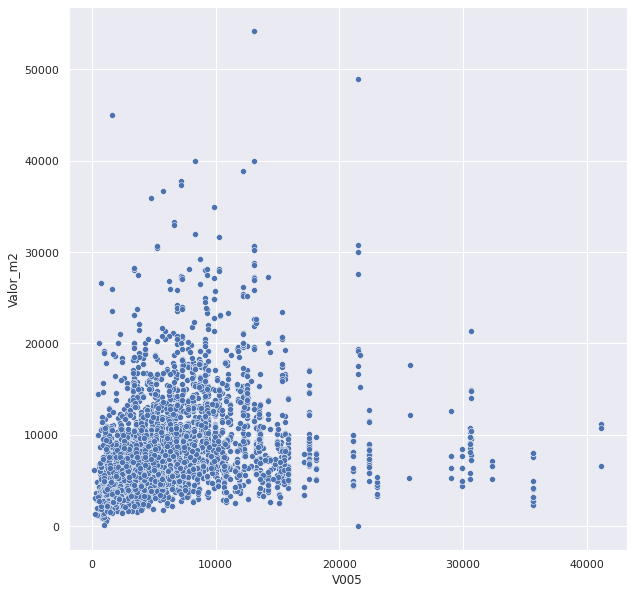

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = dados_vendas_censo, x="V005", y="Valor_m2")

Desafios desta aula 4
1 - Realizar uma análise dos dados do IBGE por mapa, analisando a distribuição de renda.

2 - Repassar a aula para entender melhor o que foi realizado.

3 - Aprofundar a análise entre dados de vendas e renda.

4 - Realizar a análise exploratória e encontrar variáveis relevantes para solução do problema.

# Aula 5

Boas-vindas à nossa última aula da Imersão Dados 4ª Edição!

Finalmente chegamos a aula de Machine Learning, o grande dia de criar uma IA que irá resolver todos os problemas... Bom, a verdade é que todos gostaríamos que isso fosse verdade, entretanto veremos na aula que as coisas não são tão simples assim. Para chegar em um resultado considerável, precisariámos de um tempo maior para explorar diversos algorítmos, coletar mais dados e avançar mais na exploração dos resultados... mas pode se tranquilizar! Teremos uma aula incrível para começar nossos primeiros passos em Machine Learning.

Lembre-se que o mais relevante não é o resultado, e sim entender a linha de pensamento, o que conseguimos resolver com Machine Learning, os pontos de atenção e dar os primeiros passos no desenvolvimento de modelos de ML.

Esta aula está recheada de coisas novas e interessantes. Vamos entender o que são problemas de regressão, classificação, como treinar um modelo de Machine Lerning usando o Sci-Kit Learning e muito mais.

Para ver os exercícios e todo o conteúdo que foi dado em aula, siga os passos abaixo
Acesse notebook da aula 05, com todo código trabalhando em aula.
Nesta aula vamos precisar da base de dados já tratadas. Baixe neste link e salvar no seu drive.
Na parte superior esquerdo, clique em >File, logo depois em >Save a copy in Drive.
Se você não estiver logado em uma conta Gmail, um pop-up solicitará que você crie ou faça login de em uma conta Google.
Feito o login uma cópia da aula é criada em seu drive (pasta Colab Notebook, criada automaticamente).
Abra o notebook e boa diversão.
Desafios desta aula

1 - Adicionar o valor "real" do m² do imóvel.

2 - Testar outro modelo de regressão.

3 - Criar um modelo baseline com as features originais.

4 - Trabalhar mais nos dados e criar novas variáveis.

5 - Testar as predições para casos reais.

6 - Criar um projeto com os resultados da Imersão e postar nas redes sociais mostrando o trabalho realizado. Lembre-se de marcar a @AluraOnline e utilizar as hashtags #ImersãoDados e #ImersãoDados4.

Alguns lembretes e dicas

Explore a documentação do Sci-kit-learn https://scikit-learn.org/stable/ .

Quer saber mais sobre correlação? Este material é ótimo. https://en.wikipedia.org/wiki/Correlation

Que tal desmistificar alguns termos em ML? https://www.alura.com.br/artigos/desmistificando-termos-machine-learning-tipos-aprendizado

Você também pode entender mais sobre a maldição da dimensionalidade. https://en.wikipedia.org/wiki/Curse_of_dimensionality

Quer conhecer um pouco mais sobre String? Se liga neste material. https://panda.ime.usp.br/pensepy/static/pensepy/08-Strings/strings.html

Um guia rápido para o Pandas. https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

Discord e redes sociais
Participe do nosso Discord, tire suas dúvidas e ajude as outras pessoas que estão participando da Imersão. A melhor forma de aprender é ensinando!

Aproveite também para compartilhar sua participação na Imersão Dados em suas redes sociais! Poste sobre seus projetos no LinkedIn, Twitter e Instagram com as hashtags #ImersãoDados e #ImersãoDados4.

Bons estudos!



# Prática da Aula 5


In [6]:
dados_vendas_censo = pd.read_csv('/content/dados_vendas_censo.csv') 

In [7]:
#pd.set_option("display.precision", 2)
#pd.set_option('display.float_format', lambda x: '%.2f' % x)
#sns.set()

# dados_vendas_censo = pd.read_csv("/content/drive/MyDrive/imersao_dados_4/dados_vendas_censo.csv")
dados_vendas_censo = dados_vendas_censo[['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas',
       'Valor_anuncio', 'Valor_mm', 'Valor_m2', 'latitude', 'longitude', 'Situacao_setor', 'V001',
       'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010',
       'V011', 'V012']].dropna()



In [8]:
dados_vendas_censo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.0,7.000,7000.000000,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.0,3.700,7459.677419,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.0,0.380,3040.000000,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.0,0.540,5400.000000,...,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.0,1.980,4500.000000,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5599,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,960000.0,0.960,6114.649682,...,2.17,1.27,5054.58,33245189.73,5231.93,33485189.78,3649.06,26562232.53,4551.66,29032823.35
5600,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.0,1.500,5617.977528,...,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
5601,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.0,0.665,7000.000000,...,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
5603,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.0,1.050,5121.951220,...,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


In [9]:
dados_vendas_censo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5308 entries, 0 to 5604
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rua             5308 non-null   object 
 1   Bairro          5308 non-null   object 
 2   Cidade          5308 non-null   object 
 3   Metragem        5308 non-null   int64  
 4   Quartos         5308 non-null   int64  
 5   Banheiros       5308 non-null   int64  
 6   Vagas           5308 non-null   int64  
 7   Valor_anuncio   5308 non-null   float64
 8   Valor_mm        5308 non-null   float64
 9   Valor_m2        5308 non-null   float64
 10  latitude        5308 non-null   float64
 11  longitude       5308 non-null   float64
 12  Situacao_setor  5308 non-null   float64
 13  V001            5308 non-null   float64
 14  V002            5308 non-null   float64
 15  V003            5308 non-null   float64
 16  V004            5308 non-null   float64
 17  V005            5308 non-null   f

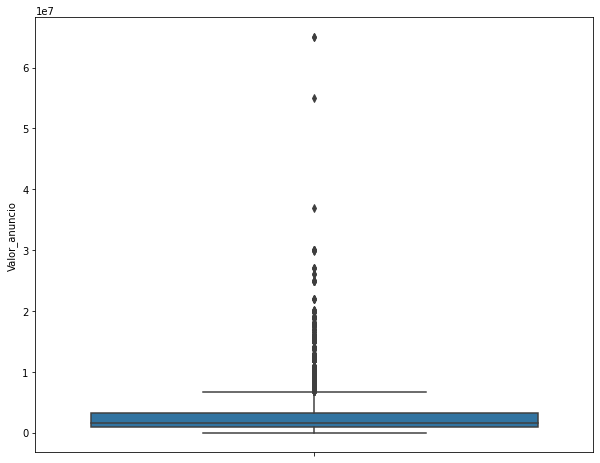

In [10]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas_censo, y="Valor_anuncio")
plt.show()

In [11]:
dados_vendas_censo.query("Valor_anuncio > 30000000 | Valor_anuncio < 100000")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
54,Rua Inglaterra,Jardim Europa,São Paulo,200,3,3,2,13000.0,0.013,65.000000,...,3.13,2.87,21545.71,1.577883e+09,26081.65,1.794040e+09,11050.67,8.823387e+08,15470.93,1.168079e+09
89,Rua Inglaterra,Jardim Europa,São Paulo,756,5,4,10,37000000.0,37.000,48941.798942,...,3.13,2.87,21545.71,1.577883e+09,26081.65,1.794040e+09,11050.67,8.823387e+08,15470.93,1.168079e+09
1032,Praça Nicolau Scarpa,Jardim América,São Paulo,1200,4,4,25,65000000.0,65.000,54166.666667,...,3.57,3.01,13131.61,5.081660e+08,14507.30,5.417648e+08,7934.91,3.647763e+08,10168.24,4.450017e+08
3521,Rua Estados Unidos,Jardim América,São Paulo,1816,4,10,20,55000000.0,55.000,30286.343612,...,3.57,3.01,13131.61,5.081660e+08,14507.30,5.417648e+08,7934.91,3.647763e+08,10168.24,4.450017e+08
3896,Rua Estados Unidos,Jardim América,São Paulo,1200,4,6,24,65000000.0,65.000,54166.666667,...,3.57,3.01,13131.61,5.081660e+08,14507.30,5.417648e+08,7934.91,3.647763e+08,10168.24,4.450017e+08


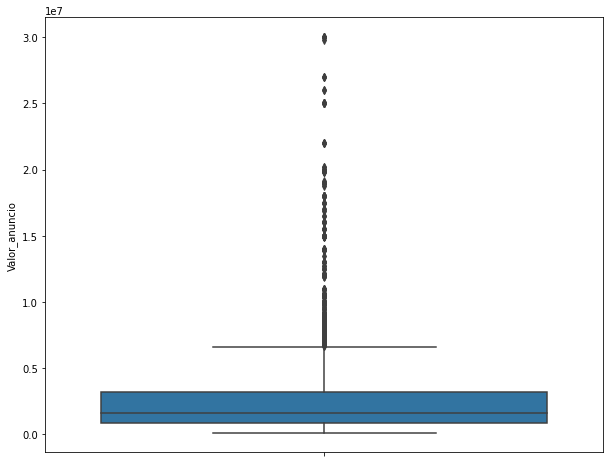

In [12]:
# excluindo valores discrepantes 

dados_vendas_censo.drop(dados_vendas_censo.query("Valor_anuncio > 30000000 | Valor_anuncio < 100000").index, inplace = True)
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas_censo, y="Valor_anuncio")
plt.show()

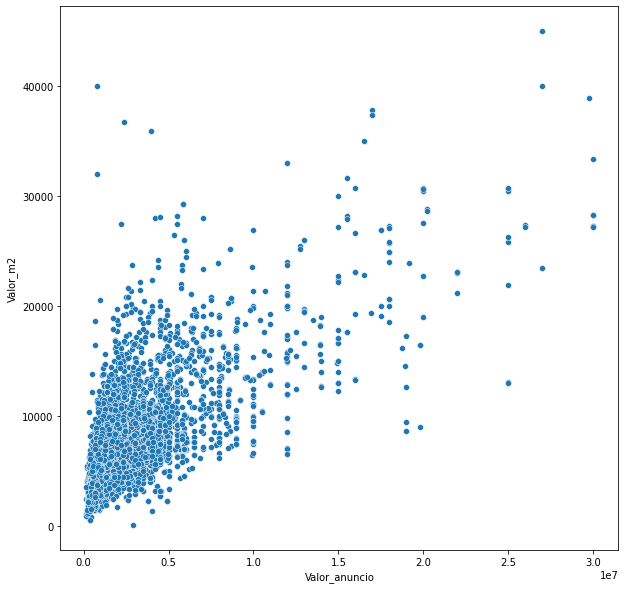

In [13]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = dados_vendas_censo, x="Valor_anuncio", y="Valor_m2")

In [14]:
dados_vendas_censo.corr()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,latitude,longitude,Situacao_setor,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
Metragem,1.000000,0.232276,0.234934,0.274053,0.303592,0.303592,0.056089,-0.086163,-0.128923,0.482483,...,0.126527,0.049062,0.224889,0.065875,0.225569,0.049841,0.204488,0.072230,0.208632,0.051737
Quartos,0.232276,1.000000,0.547296,0.417825,0.369636,0.369636,0.121157,-0.013228,-0.186287,-0.007003,...,0.156817,0.071148,0.319978,0.121673,0.332415,0.111638,0.310049,0.125277,0.323354,0.108830
Banheiros,0.234934,0.547296,1.000000,0.456339,0.469255,0.469255,0.220071,-0.034627,-0.248512,-0.025705,...,0.208197,0.070469,0.407611,0.110595,0.410926,0.084933,0.389566,0.114956,0.397168,0.084741
Vagas,0.274053,0.417825,0.456339,1.000000,0.475316,0.475316,0.149995,-0.037659,-0.185703,-0.012324,...,0.235325,0.085575,0.344286,0.106198,0.344335,0.078380,0.318941,0.121635,0.330401,0.088030
Valor_anuncio,0.303592,0.369636,0.469255,0.475316,1.000000,1.000000,0.703748,0.015516,-0.209943,-0.003601,...,0.127991,0.080879,0.449633,0.107548,0.445503,0.072232,0.470024,0.130210,0.448162,0.083339
Valor_mm,0.303592,0.369636,0.469255,0.475316,1.000000,1.000000,0.703748,0.015516,-0.209943,-0.003601,...,0.127991,0.080879,0.449633,0.107548,0.445503,0.072232,0.470024,0.130210,0.448162,0.083339
Valor_m2,0.056089,0.121157,0.220071,0.149995,0.703748,0.703748,1.000000,0.051428,-0.181037,-0.031364,...,-0.126565,0.009049,0.290189,0.042410,0.279019,0.018836,0.366010,0.052527,0.315668,0.021929
latitude,-0.086163,-0.013228,-0.034627,-0.037659,0.015516,0.015516,0.051428,1.000000,0.150834,-0.027703,...,-0.054556,0.027244,-0.048720,-0.089611,-0.065256,-0.069906,-0.038548,-0.071035,-0.065946,-0.058243
longitude,-0.128923,-0.186287,-0.248512,-0.185703,-0.209943,-0.209943,-0.181037,0.150834,1.000000,-0.009047,...,-0.045846,0.022275,-0.359216,-0.096183,-0.358897,-0.073212,-0.377897,-0.103893,-0.368728,-0.074432
Situacao_setor,0.482483,-0.007003,-0.025705,-0.012324,-0.003601,-0.003601,-0.031364,-0.027703,-0.009047,1.000000,...,0.025595,0.002048,-0.028839,-0.007060,-0.029478,-0.005075,-0.035241,-0.007349,-0.032637,-0.004958


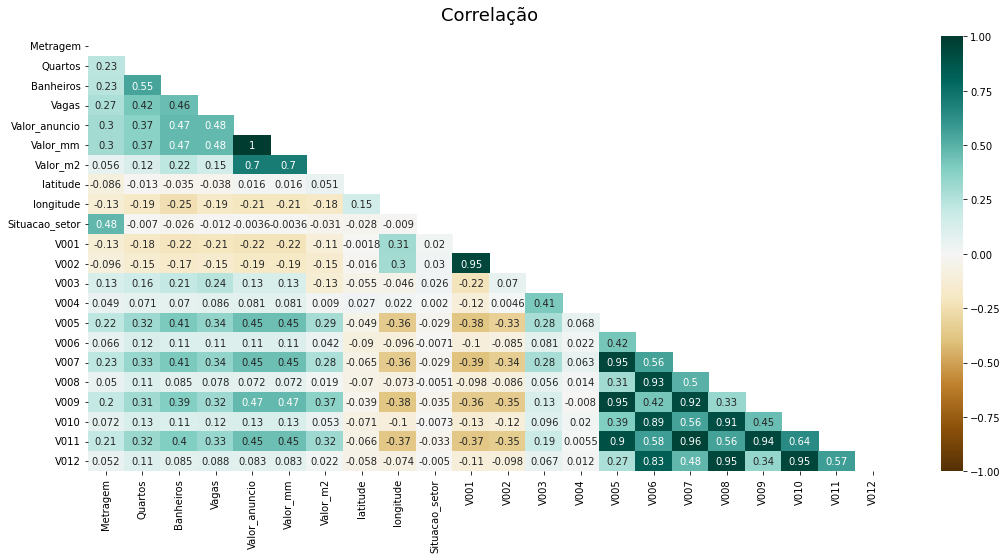

In [15]:
plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
mask = np.triu(np.ones_like(dados_vendas_censo.corr(), dtype=bool))
heatmap = sns.heatmap(dados_vendas_censo.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação', fontdict={'fontsize':18}, pad=16);

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = dados_vendas_censo[["Metragem"]]
Y = dados_vendas_censo["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)
lr = LinearRegression()

In [ ]:
X_train

,Metragem
3522,105
881,240
769,324
3364,484
4674,103
...,...
3558,397
3994,224
5432,238
4044,300


In [ ]:
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_predict_test = lr.predict(X_test)

In [ ]:
Y_predict_train = lr.predict(X_train)

In [ ]:
Y_train

3522    692000.00
881    1490000.00
769    2100000.00
3364   6700000.00
4674    622500.00
          ...    
3558   4280000.00
3994   1500000.00
5432   2300000.00
4044   1600000.00
948    3280000.00
Name: Valor_anuncio, Length: 3977, dtype: float64

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score


mean_absolute_error(Y_test, Y_predict_test)

1770626.9062636306

In [ ]:
mean_absolute_error(Y_train, Y_predict_train)

1825220.3034549057

In [ ]:
X = dados_vendas_censo[['Metragem', 'Quartos', 'Banheiros', 'Vagas','V001','V007', 'V009']]

Y = dados_vendas_censo["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)
lr.fit(X_train, Y_train)
Y_predict_test = lr.predict(X_test)
Y_predict_train = lr.predict(X_train)
mae_test = mean_absolute_error(Y_test, Y_predict_test)
r2_test = r2_score(Y_test, Y_predict_test)
mae_train = mean_absolute_error(Y_train, Y_predict_train)
r2_train = r2_score(Y_train, Y_predict_train)

In [ ]:
mae_test

1349590.384432537

In [ ]:
r2_test

0.37745069254620534

In [ ]:
mae_train

1362945.691504754

In [ ]:
r2_train

0.39899592785823335

In [ ]:
mae_test

1349590.384432537

In [ ]:
r2_test

0.37745069254620534

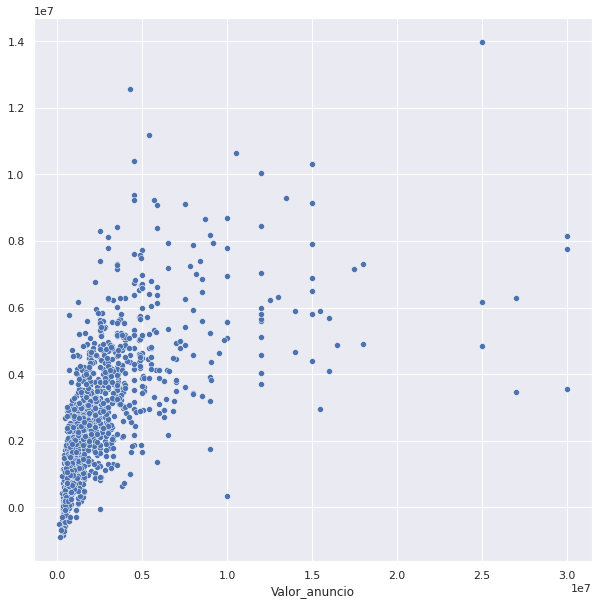

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=Y_test, y=Y_predict_test)

#Desafio Aula 5

1 - Adicionar o valor "real" do m2 do imóvel. 

2 - Testar outro modelos de regressão.

3 - Criar um modelo baseline com as features originais.

4 - Trabalhar um pouco mais nos dados e criar novas variáveis.

5 - Testar as predições para casos reais. 

6 - Criar um projeto com os resultados da imersão. Postar nas redes sociais mostrando o trabalho realizado. 

# Apêndice - MAPAS

In [ ]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Existem 3434 imóveis que não não apresentam "nome de rua". 

In [ ]:
import folium 
fmap = folium.Map()

In [ ]:
fmap

#Prática com GeoPandas.


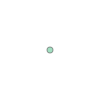

In [ ]:
Point(5,10)
ponto = Point(5,10)
ponto

In [ ]:
ponto.coords

In [ ]:
list(ponto.coords)

[(5.0, 10.0)]

In [ ]:
x = ponto.x
y = ponto.y
print(x,y)

5.0 10.0


In [ ]:
ponto1 = Point(1,2)
ponto2 = Point(5,9)

distancia_a = ponto1.distance(ponto2)
print(distancia_a)

8.06225774829855


In [ ]:
distancia_b = ponto2.distance(ponto1)
print(distancia_b)

8.06225774829855


In [ ]:
ponto_1 = Point(2,3)
ponto_2 = Point(5,7)
ponto_3 = Point(2,10)

In [ ]:
linha = LineString([ponto_1, ponto_2, ponto_3])

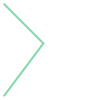

In [ ]:
linha

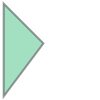

In [ ]:
poligono = Polygon([(2,3),(5,7),(2,10)])
poligono

In [ ]:
# obter coordenadas do poligono
list(poligono.exterior.coords)

[(2.0, 3.0), (5.0, 7.0), (2.0, 10.0), (2.0, 3.0)]

In [ ]:
# calcular a área
area_poligono = poligono.area
print(f'A área do poligono é {area_poligono}')

A área do poligono é 10.5


In [ ]:
centroide = poligono.centroid
print(f'O ponto central do poligono é {centroide}')

O ponto central do poligono é POINT (3 6.666666666666667)


In [ ]:
# coordenadas do bounding box
bounding_box = poligono.bounds
bounding_box 

(2.0, 3.0, 5.0, 10.0)

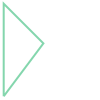

In [ ]:
# coordenadas da linha exterior
poligono.exterior

In [ ]:
print("Exterior ", poligono.exterior)

Exterior  LINEARRING (2 3, 5 7, 2 10, 2 3)


In [ ]:
# obter o tamnaho da linha exterior
poligono_exterior_length = poligono.exterior.length
print('O comprimento do poligono é ', poligono_exterior_length)

O comprimento do poligono é  16.242640687119284


# **Operações Basicas entre Geometrias**

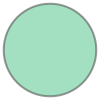

In [ ]:
# criando 2 circulos
circulo1 = Point(1,1).buffer(1)
circulo2 = Point(2,1).buffer(1)
circulo2

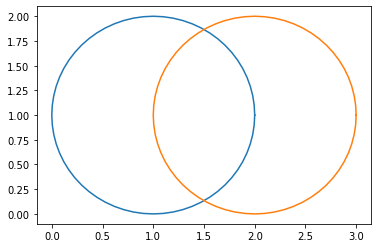

In [ ]:
# plotar os 2 circulos com o matplotlib
x,y = circulo1.exterior.xy
plt.plot(x,y)

x,y = circulo2.exterior.xy
plt.plot(x,y)
plt.show()

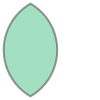

In [ ]:
# operação de intersecção
circulo1.intersection(circulo2)

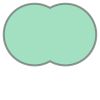

In [ ]:
# operação de união
circulo1.union(circulo2)

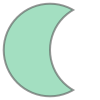

In [ ]:
# diferença circulo1 - circulo2
circulo1.difference(circulo2)

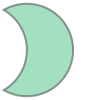

In [ ]:
# diferença circulo2 - circulo1
circulo2.difference(circulo1)

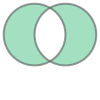

In [ ]:
# diferença simétrica
circulo1.symmetric_difference(circulo2)

In [16]:
dados_vendas_censo[['longitude','latitude']] # trocando as posições.

,longitude,latitude
0,-46.648162,-23.615793
1,-46.688311,-23.640961
2,-46.695889,-23.752990
3,-46.588173,-23.549960
4,-46.760077,-23.593796
...,...,...
5599,-46.678302,-23.603517
5600,-46.647258,-23.609093
5601,-46.691521,-23.661018
5603,-46.632983,-23.616124


In [ ]:
# dados_vendas_censo[['latitude','longitude']]

In [17]:
dados_vendas_censo = dados_vendas_censo.dropna(subset = ['latitude','longitude', 'Valor_m2', 'Metragem','Valor_anuncio'])

In [18]:
from shapely.geometry import Point

In [19]:
dados_vendas_censo['geometry'] = None

for index, row in dados_vendas_censo.iterrows():
    dados_vendas_censo.loc[index, 'geometry'] = Point(row.longitude, row.latitude)


/usr/local/lib/python3.7/dist-packages/pandas/core/internals/managers.py:327: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  applied = getattr(b, f)(**kwargs)


In [73]:
dados_vendas_censo.head(3)


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,geometry
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.0,7.00,7000.000000,...,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74,POINT (-46.64816 -23.61579)
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.0,3.70,7459.677419,...,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90,POINT (-46.68831 -23.64096)
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.0,0.38,3040.000000,...,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88,POINT (-46.69589 -23.75299)


In [21]:
type(dados_vendas_censo)

pandas.core.frame.DataFrame

In [71]:
# criando o geodataframe
gdf_dados_vendas_censo = gpd.GeoDataFrame(dados_vendas_censo, geometry = 'geometry')

In [72]:
type(gdf_dados_vendas_censo)

geopandas.geodataframe.GeoDataFrame

In [74]:
gdf_dados_vendas_censo # observa-se que ainda é um dataframe, porém agora com a sutileza da coluna geometry

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,geometry
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.0,7.000,7000.000000,...,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74,POINT (-46.64816 -23.61579)
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.0,3.700,7459.677419,...,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90,POINT (-46.68831 -23.64096)
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.0,0.380,3040.000000,...,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88,POINT (-46.69589 -23.75299)
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.0,0.540,5400.000000,...,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69,POINT (-46.58817 -23.54996)
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.0,1.980,4500.000000,...,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46,POINT (-46.76008 -23.59380)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5599,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,960000.0,0.960,6114.649682,...,1.27,5054.58,33245189.73,5231.93,33485189.78,3649.06,26562232.53,4551.66,29032823.35,POINT (-46.67830 -23.60352)
5600,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.0,1.500,5617.977528,...,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85,POINT (-46.64726 -23.60909)
5601,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.0,0.665,7000.000000,...,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57,POINT (-46.69152 -23.66102)
5603,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.0,1.050,5121.951220,...,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33,POINT (-46.63298 -23.61612)


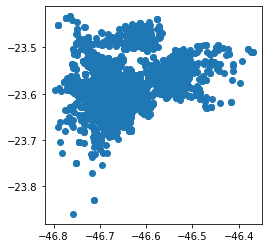

In [75]:
gdf_dados_vendas_censo.plot()

In [33]:
filename = '/content/bairros.geojson'
gdf_capital_sp = gpd.read_file(filename, driver = 'GeoJSON')

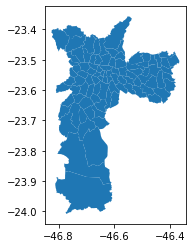

In [76]:
gdf_capital_sp.plot()

In [29]:
import matplotlib.pyplot as plt

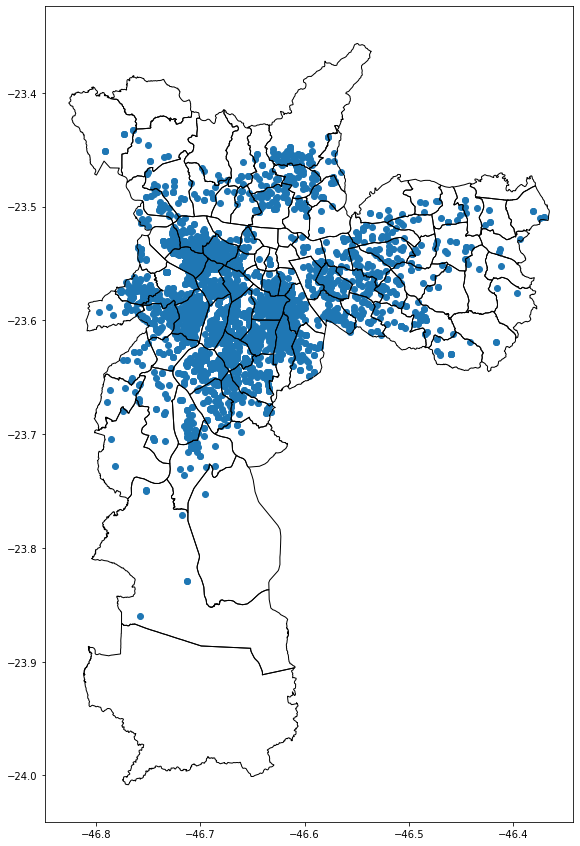

In [77]:
fig, ax = plt.subplots(figsize = (15,15))

gdf_dados_vendas_censo.plot(ax = ax)
gdf_capital_sp.plot(ax = ax, facecolor = 'None', edgecolor = 'black')


In [40]:
polygon_sp = gdf_capital_sp.iloc[0].geometry

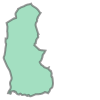

In [78]:
polygon_sp

In [42]:
gdf_dados_vendas_censo_capital = gdf_dados_vendas_censo[gdf_dados_vendas_censo.intersects(polygon_sp)]

In [46]:
filename2 = '/content/drive/MyDrive/Imersao_Dados_Alura/dados_vendas_GeoDataFrame.json'
gdf_dados_vendas_censo.to_file(filename2, drive = 'GeoJSON')

In [47]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
import folium

In [79]:
fmap = folium.Map()
fmap

In [52]:
gdf_dados_vendas = gpd.read_file('/content/drive/MyDrive/Imersao_Dados_Alura/dados_vendas_GeoDataFrame.json', driver = "GeoJSON")

In [80]:
gdf_dados_vendas

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V004,V005,V006,V007,V008,V009,V010,V011,V012,geometry
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.0,7.000,7000.000000,...,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74,POINT (-46.64816 -23.61579)
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.0,3.700,7459.677419,...,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90,POINT (-46.68831 -23.64096)
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.0,0.380,3040.000000,...,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88,POINT (-46.69589 -23.75299)
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.0,0.540,5400.000000,...,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69,POINT (-46.58817 -23.54996)
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.0,1.980,4500.000000,...,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46,POINT (-46.76008 -23.59380)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5298,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,960000.0,0.960,6114.649682,...,1.27,5054.58,33245189.73,5231.93,33485189.78,3649.06,26562232.53,4551.66,29032823.35,POINT (-46.67830 -23.60352)
5299,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.0,1.500,5617.977528,...,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85,POINT (-46.64726 -23.60909)
5300,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.0,0.665,7000.000000,...,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57,POINT (-46.69152 -23.66102)
5301,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.0,1.050,5121.951220,...,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33,POINT (-46.63298 -23.61612)


In [81]:
gdf_dados_vendas_slice = gdf_dados_vendas.iloc[ :100]
fmpa = folium.Map()

feat_geojson = folium.features.GeoJson(gdf_dados_vendas_slice)

fmap.add_child(feat_geojson)
fmap

In [82]:
media_latitude = gdf_dados_vendas_slice['longitude'].mean()
media_longitude = gdf_dados_vendas_slice['latitude'].mean()

fmpa = folium.Map(location = [media_latitude, media_longitude])

feat_geojson = folium.features.GeoJson(gdf_dados_vendas_slice)

fmap.add_child(feat_geojson)
fmap

In [83]:
from folium.plugins import FastMarkerCluster

In [93]:
fmpa = folium.Map(location = [media_latitude, media_longitude])
mc = FastMarkerCluster(gdf_dados_vendas_slice[['latitude', 'longitude']])

fmap.add_child(mc)

fmap

RecursionError: ignored

############################ FIM tESTE GEOPANDAS ############